# Airline on time performance
## by Carolina Negrelli

## Preliminary Wrangling

> In this project I'm going to analyze a data set with information about flights in the United States. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

> This data set is one of the selected by udacity. But the file has been deleted from the source given in the dataset options (http://stat-computing.org/dataexpo/2009/the-data.html), insteed I had to go to the original source and download the full table (https://www.transtats.bts.gov/DL_SelectFields.asp). I downloaded the data from January 2019 to December 2019.

In [4]:
all_files = glob.glob("data/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (48,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (48,69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (48,76,77,84,85,92) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (48,77,84) have mixed types.Specify dtype option on import 

> I will keep only the columns described on the source given by Udacity. I will drop the column Year since it's olny data from 2019. Three of the columns have another name: TailNum -> Tail_Number, FlightNum -> Flight_Number_Reporting_Airline, UniqueCarrier -> Reporting_Airline

In [5]:
flights = frame[['Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime','Reporting_Airline','Flight_Number_Reporting_Airline','Tail_Number','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay','Origin','Dest','Distance','TaxiIn','TaxiOut','Cancelled','CancellationCode','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]

> Let's take a look on the dataframe

In [6]:
flights.shape

(7422037, 28)

In [5]:
flights.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'Reporting_Airline', 'Flight_Number_Reporting_Airline',
       'Tail_Number', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
flights.sample(5)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4963598,2,3,7,1156.0,1155,1331.0,1355,OH,5149,N596NN,...,2.0,14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3299717,10,8,2,1934.0,1930,2020.0,2025,WN,45,N248WN,...,3.0,9.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1091929,6,10,1,2332.0,2325,647.0,649,DL,923,N868DN,...,8.0,14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3362170,10,7,1,1844.0,1800,2248.0,2206,YX,5934,N206JQ,...,12.0,22.0,0.0,NaN,0.0,0.0,0.0,42.0,0.0,0.0
6730728,4,2,2,920.0,925,1016.0,1036,DL,1862,N668DN,...,3.0,9.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [7]:
flights.duplicated().sum()

0

In [8]:
flights.DepDelay.describe()

count    7.291927e+06
mean     1.092327e+01
std      4.895964e+01
min     -8.200000e+01
25%     -5.000000e+00
50%     -2.000000e+00
75%      7.000000e+00
max      2.710000e+03
Name: DepDelay, dtype: float64

In [ ]:
flights.dtypes

Some problems with data types: 
- DepTime and CRSDepTime have diferent types. Idem ArrTime and CRSArrTime. Have both columns (in both cases) is not necessary since there is a column for the delay. I will keep only the scheduled times (CRS).
- Flight_Number should be a string
- Cancelled should be an integer 1: yes , 0:no. Idem Diverted

I will adress this problems before plotting

In [4]:
#code
flights.drop(['DepTime','ArrTime'],axis=1,inplace=True)

/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
#test
flights.shape

(7422037, 26)

In [6]:
#code
flights['Flight_Number_Reporting_Airline']=flights['Flight_Number_Reporting_Airline'].astype('str') 

/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
#code
flights['Cancelled']=flights['Cancelled'].astype('int')
flights['Diverted']=flights['Diverted'].astype('int')

/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#test
flights.dtypes

### What is the structure of your dataset?

> There are 7422037 flights (rows) with 26 festures (columns). Most variables are numerical but there are some categorical. 

### What is/are the main feature(s) of interest in your dataset?

> All the features asociated with delates, like Cancelled, ArrDelay, DepDelay, etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All the features should be explored, but at first I will said that Date, Time, Airline, Origin and Dest have a big influence.

## Univariate Exploration

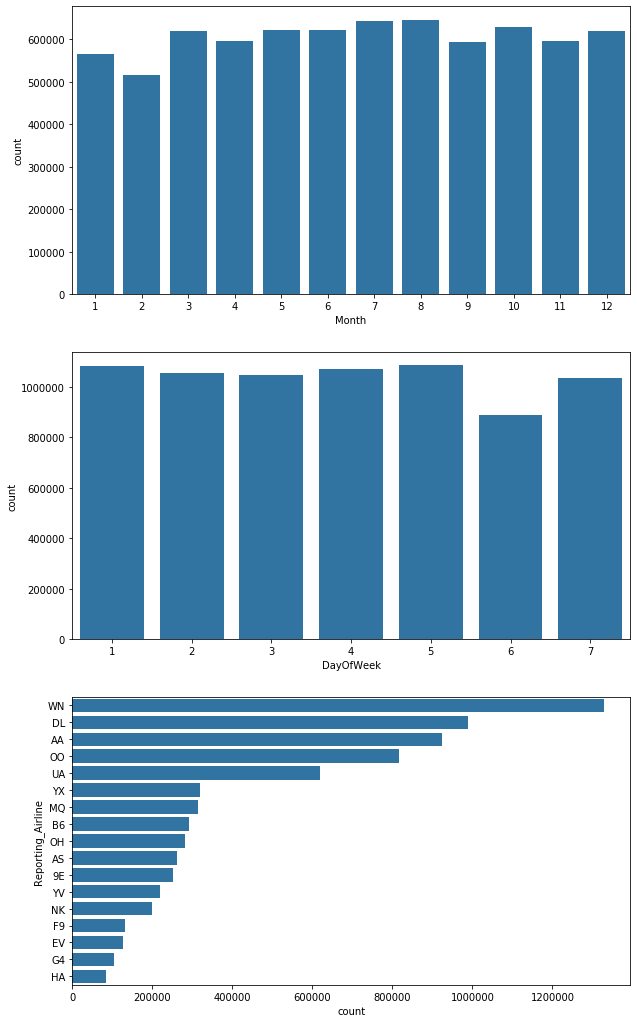

In [45]:
#let's start with the distribution of month, day of week and airline
fig, ax = plt.subplots(nrows=3, figsize = [10,18])

base_color = sb.color_palette()[0]
sb.countplot(data = flights, x = 'Month', color = base_color, ax = ax[0])
sb.countplot(data = flights, x = 'DayOfWeek', color = base_color, ax = ax[1])
order=flights['Reporting_Airline'].value_counts().index
sb.countplot(data=flights,y='Reporting_Airline',color=base_color,order=order)

- As expected, there are more flights on July and August (Holidays) but this is not a remarkable difference.
- Saturdays (6) are less flights than other days.
- There are 5 main airlines: WN (Southwest Airlines), DL (Delta Airlines), AA (American Airlines), OO (Skywest Airlines) and UA (United Airlines)

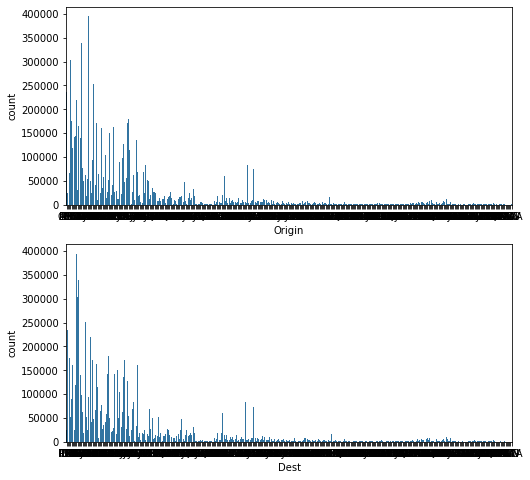

In [9]:
# what about departure and arrival cities?
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

base_color = sb.color_palette()[0]
sb.countplot(data = flights, x = 'Origin', color = base_color, ax = ax[0])
sb.countplot(data = flights, x = 'Dest', color = base_color, ax = ax[1])

- This plots doesn't tell us much: there are  a lot of cities, some with a bigger count than others. We can take a look to the biggest counts but we are not going to continue improving this plot for now.

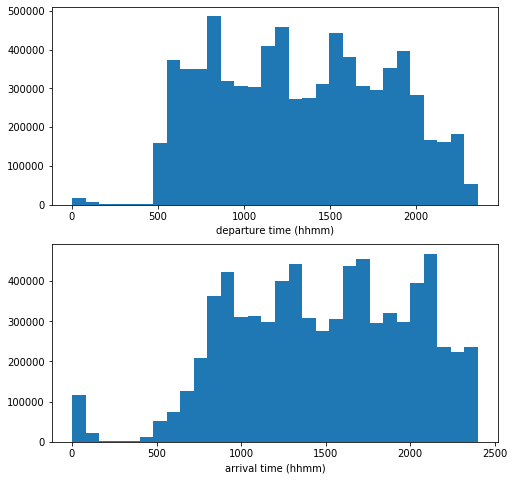

In [55]:
# departure and arrival times


plt.figure(figsize = [8,8])

base_color = sb.color_palette()[0]
plt.subplot(2,1,1)
plt.hist(data = flights, x = 'CRSDepTime',bins=30)
plt.xlabel('departure time (hhmm)')
plt.subplot(2,1,2)
plt.hist(data = flights, x = 'CRSArrTime',bins=30)
plt.xlabel('arrival time (hhmm)');

- both distributions are left skewed: there are very little flights before 5am.
- in both cases there are four peaks of flights: one in the morning, one in the nooin, one in the afternoon and one at night.

/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/caro/anaconda3/envs/py3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


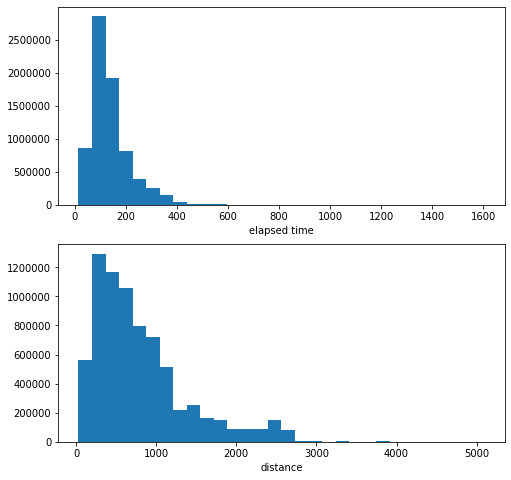

In [11]:
plt.figure(figsize = [8,8])

base_color = sb.color_palette()[0]
plt.subplot(2,1,1)
plt.hist(data = flights, x = 'ActualElapsedTime',bins=30)
plt.xlabel('elapsed time')
plt.subplot(2,1,2)
plt.hist(data = flights, x = 'Distance',bins=30)
plt.xlabel('distance');

- both distributions are very right skewed. It makes sense that both have the same distribution because the distance and the time elapsed should be correlated. We'll see this later.

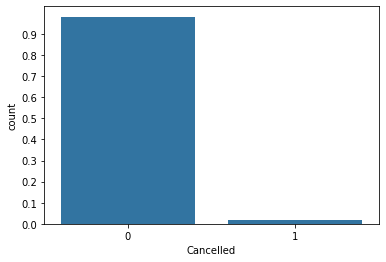

In [12]:
#relative frequencies: cancellations and diverted flights
n=flights.shape[0]
max_count=flights.Cancelled.value_counts().max()
max_prop=max_count/n
#plot
base_color = sb.color_palette()[0]
ticks=np.arange(0,max_prop,0.1)
ticks_names=['{:0.1f}'.format(v) for v in ticks]
plt.yticks(ticks*n,ticks_names)
sb.countplot(data = flights, x = 'Cancelled', color = base_color)
# 1: yes, 0 : no

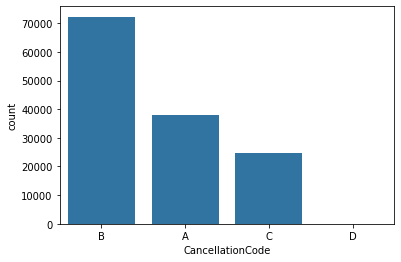

In [13]:
sb.countplot(data=flights, x='CancellationCode',color=base_color) #the letters has no ordinal meaning

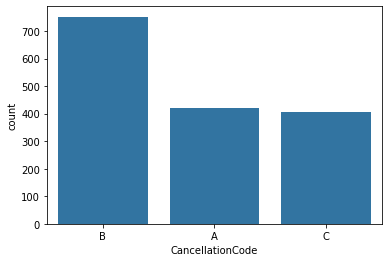

In [94]:
# for long delays
sb.countplot(data=flights[flights.DepDelay > 60], x='CancellationCode',color=base_color)

In [14]:
flights[flights.Cancelled == 1].shape[0]/n

0.018178971621941525

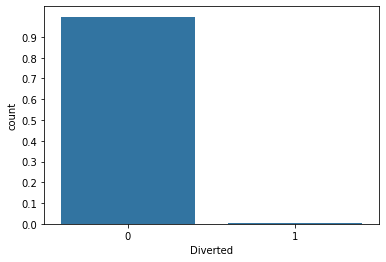

In [8]:
#relative frequencies
n=flights.shape[0]
max_count=flights.Diverted.value_counts().max()
max_prop=max_count/n
#plot
base_color = sb.color_palette()[0]
ticks=np.arange(0,max_prop,0.1)
ticks_names=['{:0.1f}'.format(v) for v in ticks]
plt.yticks(ticks*n,ticks_names)
sb.countplot(data = flights, x = 'Diverted', color = base_color)
#1: yes, 0: no

In [16]:
flights[flights.Diverted == 1].shape[0]/n

0.002543776055010235

- less than 2% of the flights were cancelled
- the most frequent cancellation reason is weather (B), follow by carrier (A) and National Air System (C). There is almost no cancellations due to security issues (D).
- less than 0.5% of the flights were diverted
- Since there are too little diverted flights I will not continue with this variable.
- Since cancelled flights are a small percent but we still have some data, I will create a sub dataset with only the cancelled flights.

In [10]:
cancelled = flights[flights.Cancelled == 1]

In [13]:
cancelled.shape

(134925, 26)

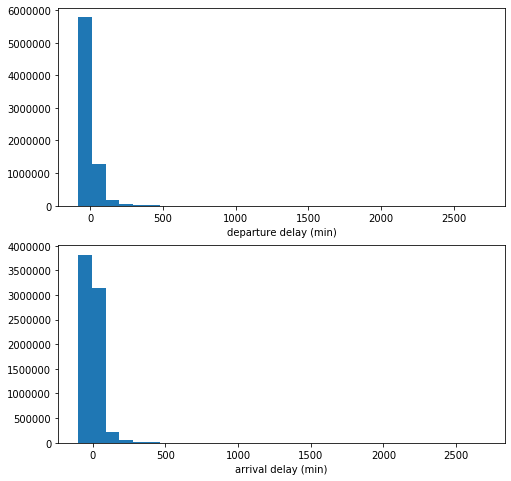

In [17]:
plt.figure(figsize = [8,8])

base_color = sb.color_palette()[0]
plt.subplot(2,1,1)
plt.hist(data = flights, x = 'DepDelay',bins=30)
plt.xlabel('departure delay (min)')
plt.subplot(2,1,2)
plt.hist(data = flights, x = 'ArrDelay',bins=30)
plt.xlabel('arrival delay (min)');

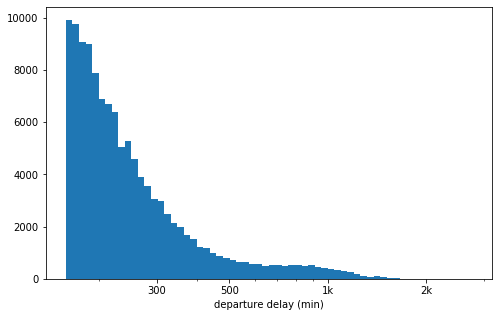

In [18]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.02
bins = 10 ** np.arange(2.2, np.log10(flights['DepDelay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = flights, x = 'DepDelay', bins = bins)
plt.xscale('log')
plt.xticks([300,500, 1e3, 2e3], [300,500, '1k', '2k'])
plt.xlabel('departure delay (min)');

In [1]:
# there is a low peak around 900min that we didn't see before, but we need to zoom in to see the lowest values
log_binsize = 0.15
bins = 10 ** np.arange(0, np.log10(1000)+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = flights, x = 'DepDelay', bins = bins)
plt.xscale('log')
plt.xticks([10,30,100,500, 1000], [10,30,100,500, '1k'])
plt.xlabel('departure delay (min)');

NameError: name 'np' is not defined

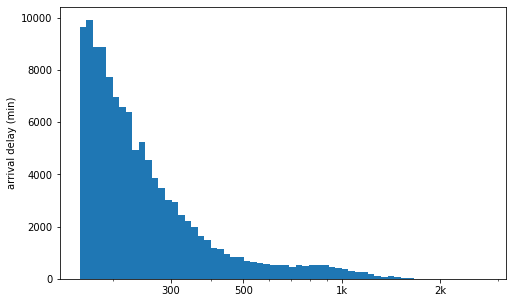

In [20]:
# let's do the same for arrivals
log_binsize = 0.02
bins = 10 ** np.arange(2.2, np.log10(flights['ArrDelay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = flights, x = 'ArrDelay', bins = bins)
plt.xscale('log')
plt.xticks([300,500, 1e3, 2e3], [300,500, '1k', '2k'])
plt.xlabel('arrival delay (min)')
plt.show()

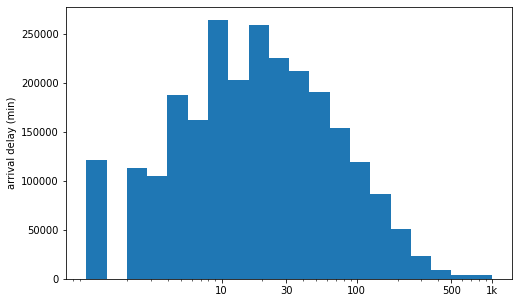

In [21]:
# there is a low peak around 900min that we didn't see before, but we need to zoom in to see the lowest values
log_binsize = 0.15
bins = 10 ** np.arange(0, np.log10(1000)+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = flights, x = 'ArrDelay', bins = bins)
plt.xscale('log')
plt.xticks([10,30,100,500, 1000], [10,30,100,500, '1k'])
plt.xlabel('arrival delay (min)')
plt.show()

In [22]:
flights[(flights.ArrDelay > 1600) | (flights.DepDelay > 1600)].count()[0]

55

- Both delate times have a maximum around 20 min and a low peak around 900 min. There is probably a correlation between this values, we'll see that later.
- we will consider any delay time bigger than 1600 an outlier.

In [7]:
#remove outliers
flights = flights[(flights.ArrDelay <= 1600) & (flights.DepDelay <= 1600)]
flights.shape

(7268177, 26)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes, in the delay times there are some outliers and also the distribution is very right skewed so I had to make a log scale.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I found a second peak on the delay times distribution which was a surprise for me. I have removed the ouliers in the delay data and created a sub datafram with the cancelled flights only.

## Bivariate Exploration

Text(0, 0.5, 'Dep delay')

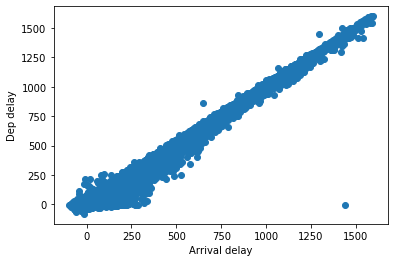

In [8]:
# Let's se the relation between both delay times
plt.scatter(data=flights,x='ArrDelay',y='DepDelay')
plt.xlabel('Arrival delay')
plt.ylabel('Dep delay')

- As we expected there is a strong correlation between the departure delay and the arrival delay (except for a few points). We can now consider just one of this variables for the following analysis. I will keep the Departure Delay.

Text(0.5, 0, 'Distance')

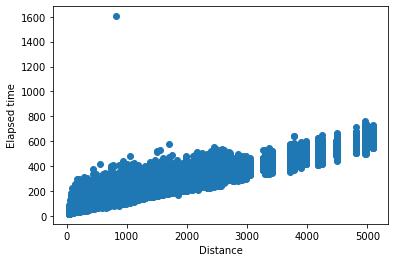

In [14]:
# Let's se the realtion between distance and elapsed time
plt.scatter(data=flights,x='Distance',y='ActualElapsedTime')
plt.ylabel('Elapsed time')
plt.xlabel('Distance')

- As we expected there is a clear correlation between distance and elapsed time (there is one clear outlier). We will take only one of this into account. I will keep time elapsed since it's a more simple variable to identify a flight.

In [25]:
#delete the outlier
flights=flights[flights.ActualElapsedTime < 1200]

<Figure size 1800x1800 with 0 Axes>

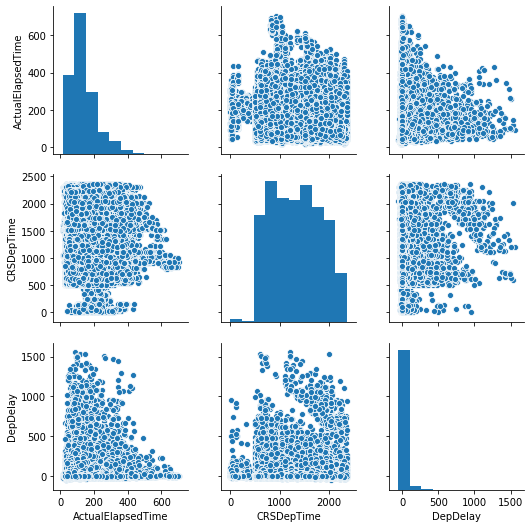

In [30]:
#let's take a quick look of some variables, we need to take a sample of the data to plot more efficientily

plt.figure(figsize=[25,25])
sb.pairplot(data=flights.sample(500000),vars=['ActualElapsedTime','CRSDepTime','DepDelay']);

- It's seems that there is no correlation between this variables

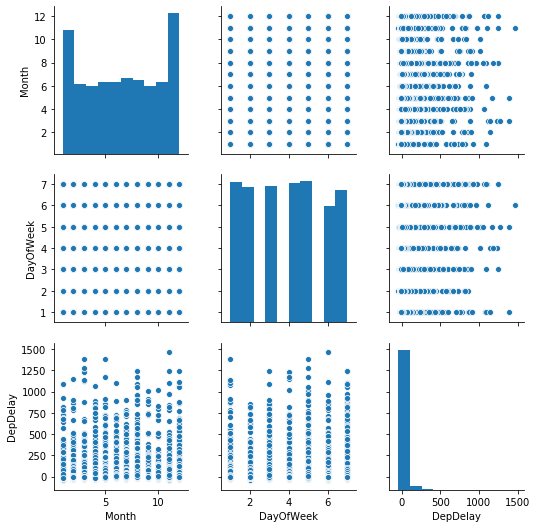

In [32]:
#let's take a quick look of some variables
sb.pairplot(data=flights.sample(100000),vars=['Month','DayOfWeek','DepDelay'])

(-30, 50)

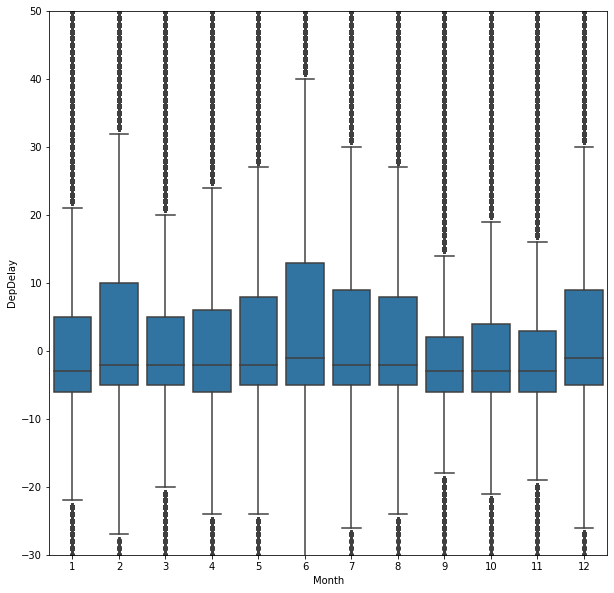

In [33]:
#we can't see anything in this plots because of the nature of the data. We have to try another kind of plot.
plt.figure(figsize=[10,10])
sb.boxplot(data=flights, x='Month', y='DepDelay',color=base_color)
plt.ylim(-30,50)

- There is no statistically difference between month when we measure de delays

(-30, 50)

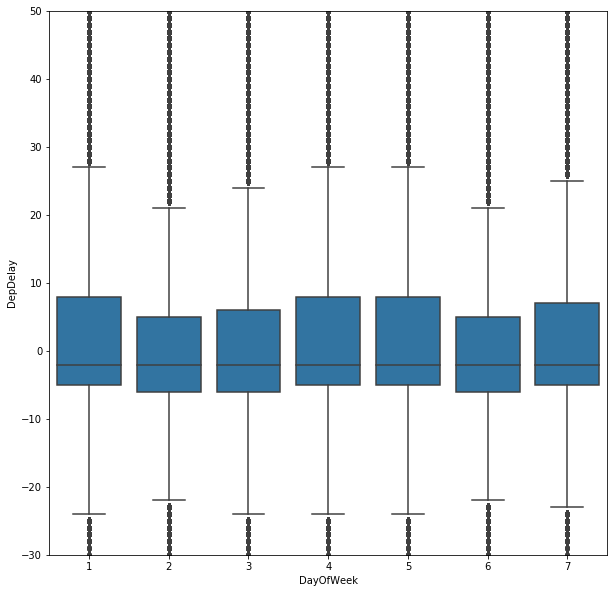

In [24]:
# What about the day of the week?
plt.figure(figsize=[10,10])
sb.boxplot(data=flights, x='DayOfWeek', y='DepDelay',color=base_color)
plt.ylim(-30,50)

- Same result for day of the week

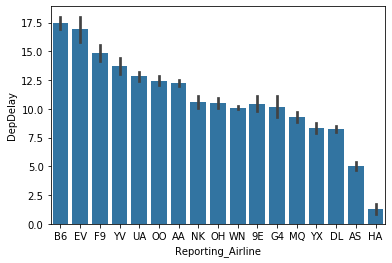

In [62]:
# What about the airline and Origin city?

#Let's consider the airlines order by count of flight

order2 = flights.groupby(['Reporting_Airline']).DepDelay.mean().sort_values(ascending=False).index

sb.barplot(data=flights.sample(1000000), x='Reporting_Airline',y='DepDelay',order=order2,color=base_color)

- We can see that the two first airlines have significative larger mean than the others
- There is only one airline with almost null delay time

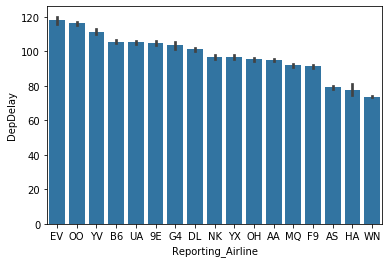

In [61]:
# how this change if we consider only the major delay times?
flights_late=flights[flights.DepDelay > 30]

order3 = flights_late.groupby(['Reporting_Airline']).DepDelay.mean().sort_values(ascending=False).index

sb.barplot(data=flights_late, x='Reporting_Airline',y='DepDelay',order=order3,color=base_color)

- When we consider only big delay times there are three airlines with significative larger means.
- There is one airline with large delay times in both cases: EV

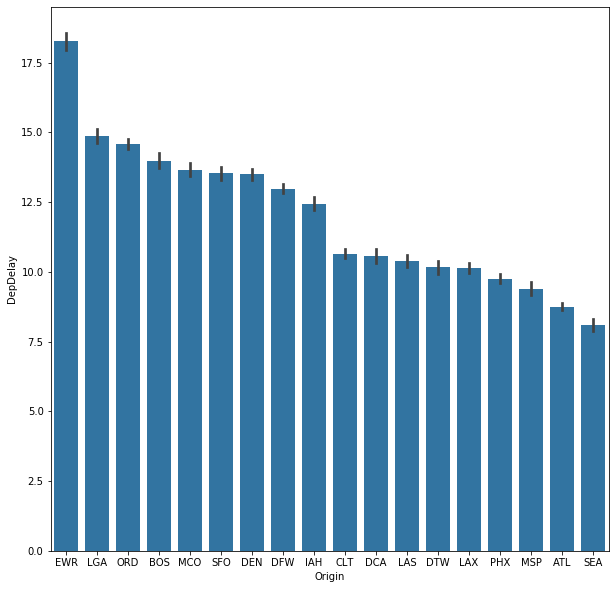

In [86]:
# what about origin city?
# lets see the cities with major counts
plt.figure(figsize=[10,10])
cities = flights.Origin.value_counts().head(18).index.tolist()
flights_cities = flights[flights.Origin.isin(cities)]
order4 = flights_cities.groupby(['Origin']).DepDelay.mean().sort_values(ascending=False).index
sb.barplot(data=flights_cities, x='Origin',y='DepDelay',color=base_color, order=order4)

- Clearly EWR (NYC) has the bigest mean delay.

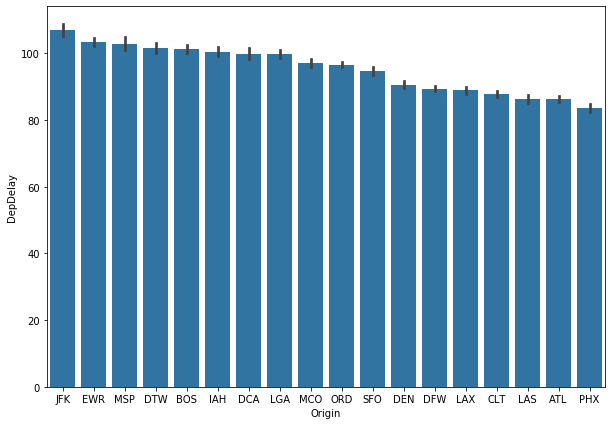

In [88]:
# what if we consider de large delay times?
plt.figure(figsize=[10,7])
cities = flights_late.Origin.value_counts().head(18).index.tolist()
flights_cities = flights_late[flights_late.Origin.isin(cities)]
order4 = flights_cities.groupby(['Origin']).DepDelay.mean().sort_values(ascending=False).index
sb.barplot(data=flights_cities, x='Origin',y='DepDelay',color=base_color, order=order4)

 - for large delays JFK (NYC) goes first but EWR is still second

Text(0.5, 1.0, 'count and delay for all the airlines')

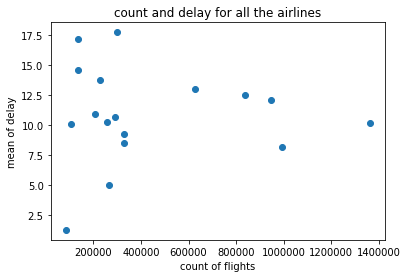

In [43]:
# let's see a little more detail
plt.scatter(flights.groupby('Reporting_Airline').Month.count(), flights.groupby('Reporting_Airline').DepDelay.mean() )
plt.xlabel('count of flights')
plt.ylabel('mean of delay')
plt.title('count and delay for all the airlines')

- There is no clear correlation: for airlines with few flights the mean delay is really spread, whule for the major airlines the mean is around 10.

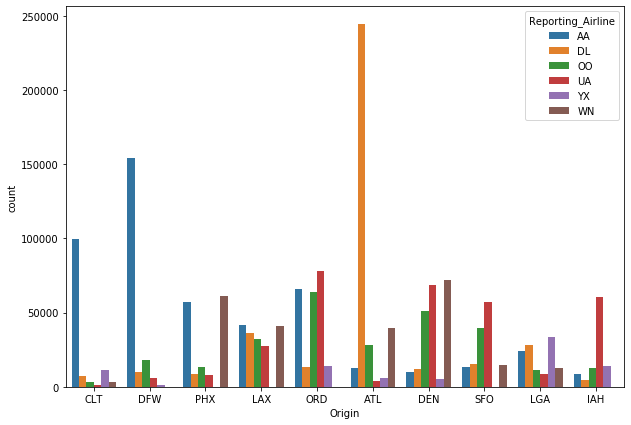

In [23]:
plt.figure(figsize=[10,7])
cities = flights.Origin.value_counts().head(10).index.tolist()
air= flights.Reporting_Airline.value_counts().head(6).index.tolist()
flights_cities = flights[flights.Origin.isin(cities)]
flights_cities_air = flights_cities[flights_cities.Reporting_Airline.isin(air)]
sb.countplot(data=flights_cities_air, x='Origin',hue='Reporting_Airline')

- Some airports have the biggest amount of flights from one airline only. 

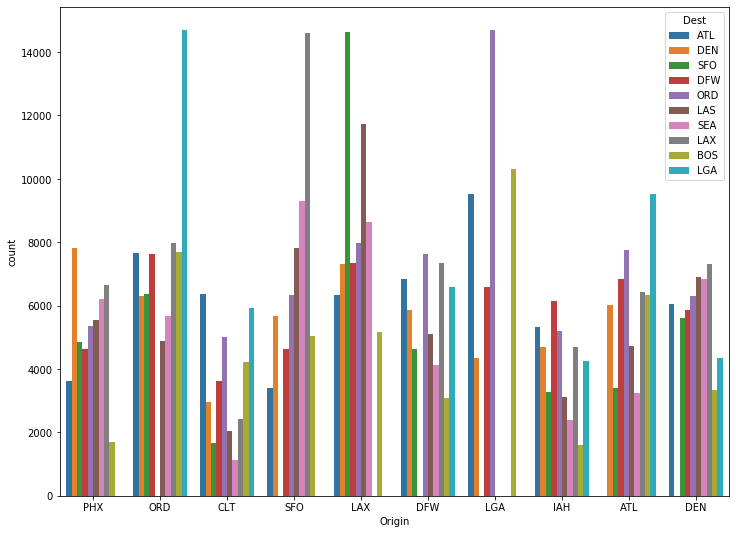

In [26]:
# let's analyse some common routes from  this principal origin cities
plt.figure(figsize=[12,9])
dest = flights_cities.Dest.value_counts().head(10).index.tolist()
routes = flights_cities[flights_cities.Dest.isin(dest)]
sb.countplot(data=routes, x='Origin',hue='Dest')

- There are some really standing routes: ORD -> LGA, SFO -> LAX, LAX -> SFO, LGA -> ORD

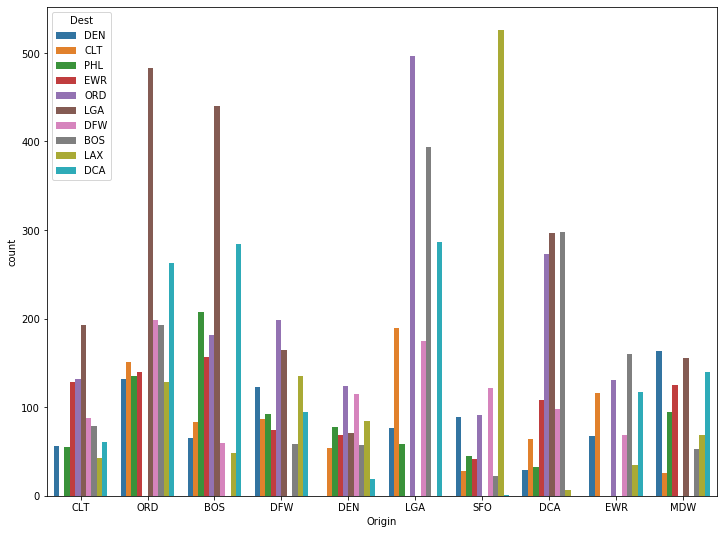

In [38]:
# let's take a look to this routes in the cancelled data frame
plt.figure(figsize=[12,9])

can_ori = cancelled.Origin.value_counts().head(10).index.tolist()
cancelled_cities = cancelled[cancelled.Origin.isin(can_ori)]
can_dest = cancelled_cities.Dest.value_counts().head(10).index.tolist()
can_routes = cancelled_cities[cancelled_cities.Dest.isin(can_dest)]
sb.countplot(data=can_routes, x='Origin',hue='Dest')

- The routes with most cancelled flights coincide with th most common routes except BOS -> LGA and LAX -> SFO

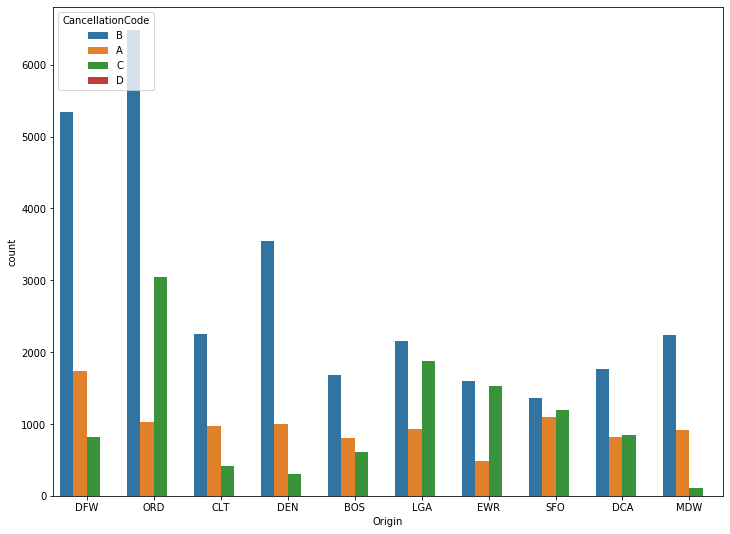

In [44]:
# let's see what are the cancellation reason in this origin cities
plt.figure(figsize=[12,9])
sb.countplot(data=cancelled_cities, x='Origin',hue='CancellationCode')

- in all the cities the most frequent cancellation reason is weather (B) but in LGA, EWR and SFO the National Air System (C) is also an importan reason. Moreover, in SFO the three main reasons (B, C and Carrier(A)) are really similar.

<Figure size 864x720 with 0 Axes>

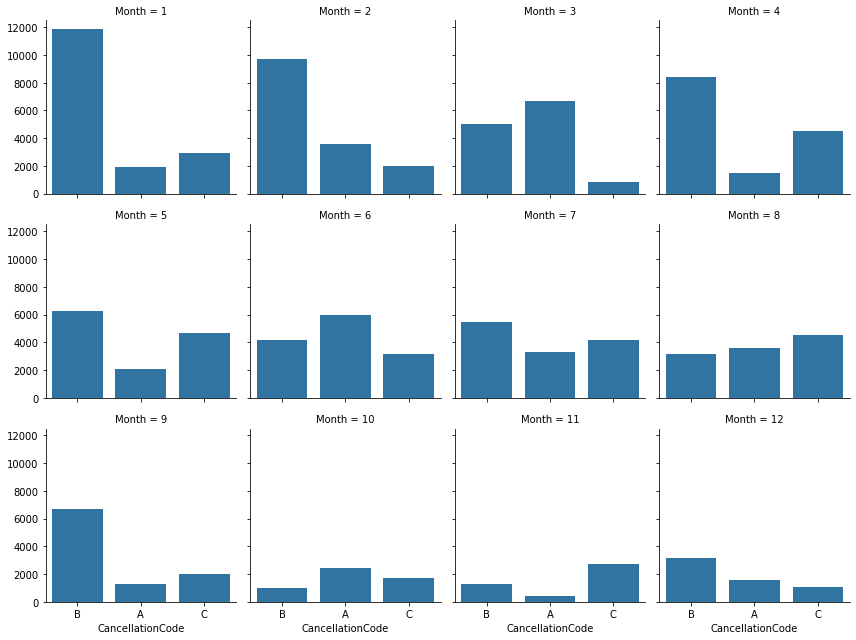

In [88]:
plt.figure(figsize = [12,10])
g=sb.FacetGrid(data = cancelled, col = 'Month', col_wrap=4, size=3)
g.map(sb.countplot, 'CancellationCode')

- There are some months were carrier delays are more important than weather delays 

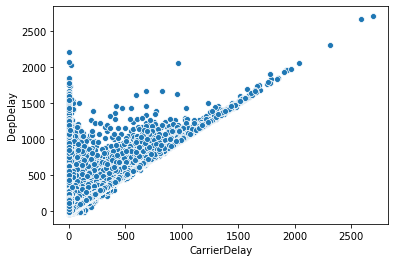

In [59]:
sb.scatterplot(data=flights, x='CarrierDelay',y='DepDelay')

- For large carrier delays there is a perfect linear relation: DepDelay = CarrierDelay

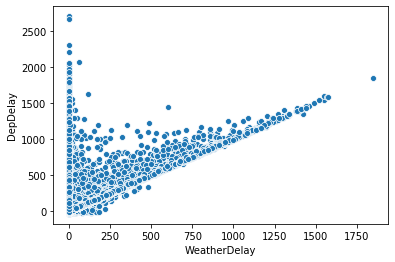

In [60]:
sb.scatterplot(data=flights, x='WeatherDelay',y='DepDelay')

- The distribution is similar but the contribution to the departure delay is less than the previous one.

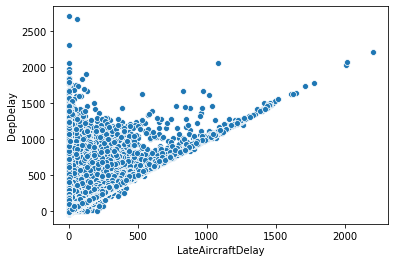

In [61]:
sb.scatterplot(data=flights, x='LateAircraftDelay',y='DepDelay')

> I'm living at Rochester, NY and I want to know how are the delays here. Let's take a look

In [29]:
Roc = flights[flights.Origin == 'ROC']

<Figure size 1800x1800 with 0 Axes>

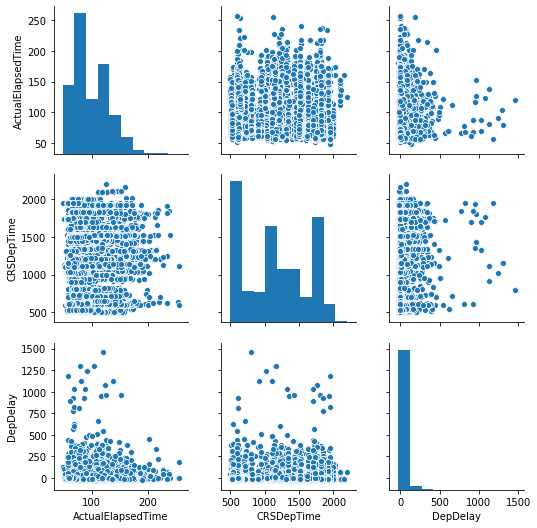

In [97]:
plt.figure(figsize=[25,25])
sb.pairplot(data=Roc,vars=['ActualElapsedTime','CRSDepTime','DepDelay']);

(-30, 50)

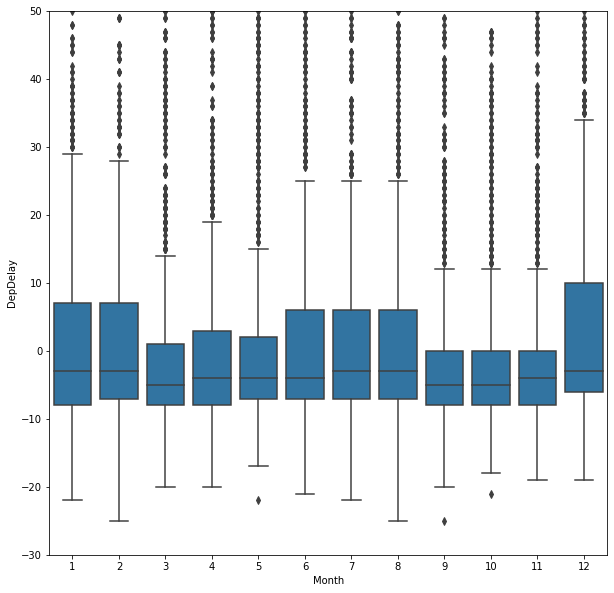

In [98]:
#we can't see anything in this plots because of the nature of the data. We have to try another kind of plot.
plt.figure(figsize=[10,10])
sb.boxplot(data=Roc, x='Month', y='DepDelay',color=base_color)
plt.ylim(-30,50)

(-30, 50)

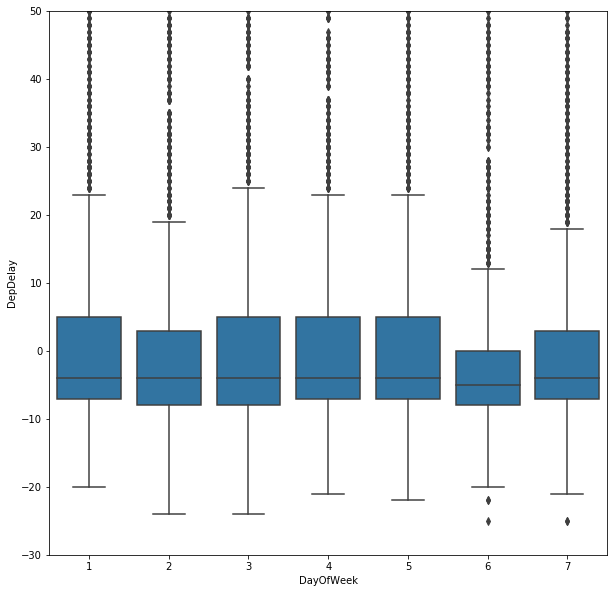

In [99]:
# What about the day of the week?
plt.figure(figsize=[10,10])
sb.boxplot(data=Roc, x='DayOfWeek', y='DepDelay',color=base_color)
plt.ylim(-30,50)

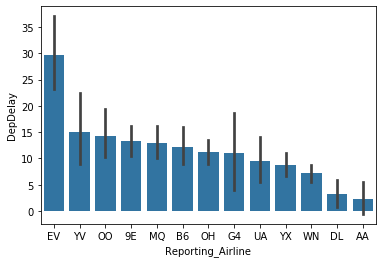

In [100]:
order2 = Roc.groupby(['Reporting_Airline']).DepDelay.mean().sort_values(ascending=False).index

sb.barplot(data=Roc, x='Reporting_Airline',y='DepDelay',order=order2,color=base_color)

- EV is the airline with the biggest mean delay, it's a huge difference (it doubles the second one)

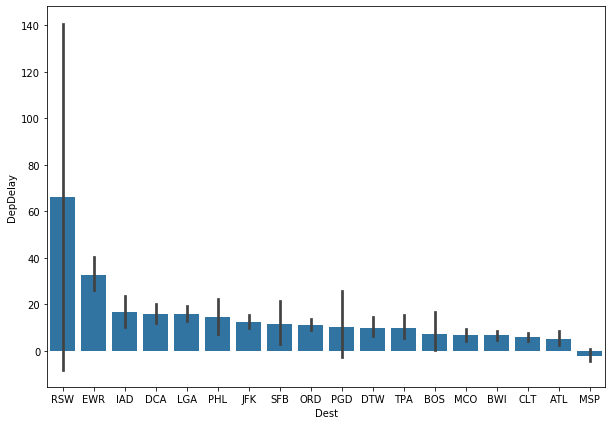

In [31]:
order2 = Roc.groupby(['Dest']).DepDelay.mean().sort_values(ascending=False).index
plt.figure(figsize=[10,7])
sb.barplot(data=Roc, x='Dest',y='DepDelay',order=order2,color=base_color)

- The biggest delay seems to be to RSW but the error bar is really big. On the other hand, the delays to EWR seems to be largest than to the others airports with statistically significance.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The delay varies with the origin city and in less amount with the airline. I expected major mean delays asociated with the biggest airlines but this is not true. The differents kind of delays have a different contribution on the departure delay, the most correlated is the carrier delay.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a linear relationship between arrival and departure delays as was expected, and bewteen Distance and Elapsed time. Also there are some routes that have a really large count of flights.

## Multivariate Exploration

In [1]:
# let's see what happens when we combain month and day of week
plt.figure(figsize = [12,10])
sb.pointplot(data = flights.sample(500000), x = 'Month', y = 'DepDelay', hue = 'DayOfWeek',linestyles = '', dodge = 0.3);

NameError: name 'plt' is not defined

- For some months there is a day of the week in which the delays are significantly larger: May (5) -> Thursday (4), June (6) -> Sunday (7), July (7) -> Thursday (4), August (8) -> Wednesday (3) and Thursday (4), September (9) and October (10)-> Thursday (4) and Friday (5), December (12) -> Monday(1) and Sunday (7).
- For some months there is a day of the week in which the delays are significantly lower: February (2), August (8), September(9) and October (10) -> Saturday (6), March (3) -> Tuesday (2), April (4) -> Wednesday (3), November (11) -> Sunday(7)

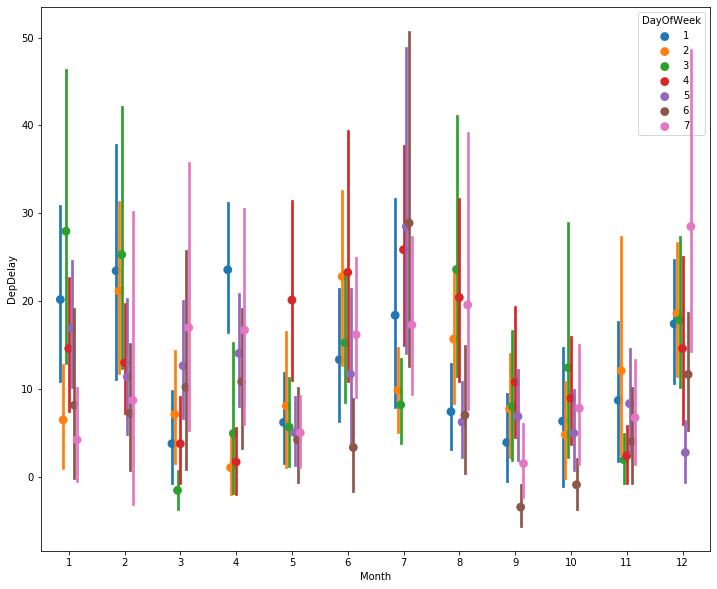

In [70]:
# same for rochester
plt.figure(figsize = [12,10])
sb.pointplot(data = Roc, x = 'Month', y = 'DepDelay', hue = 'DayOfWeek',linestyles = '', dodge = 0.3);

- We can conclude that in Rochester there is no relation between delay and date. We can only suggest to avoid Thursdays (4) on May (5).

<Figure size 864x720 with 0 Axes>

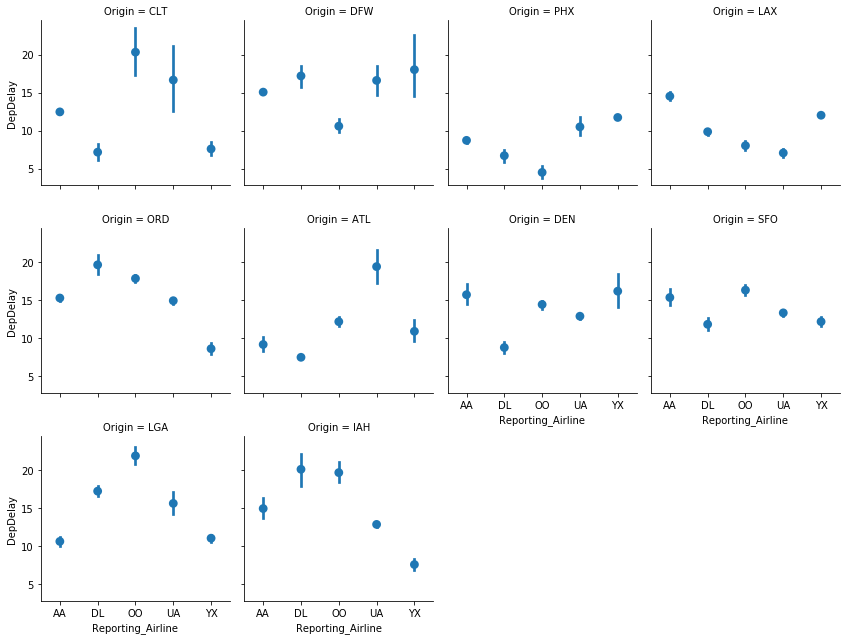

In [79]:
# let's see what happens when we combine Origin and Airline
plt.figure(figsize = [12,10])
g=sb.FacetGrid(data = flights_cities_air, col = 'Origin', col_wrap=4, size=3)
g.map(sb.pointplot, 'Reporting_Airline', 'DepDelay', linestyles="")

- Depending in the city the airlines have larger or lower delays.

<Figure size 864x720 with 0 Axes>

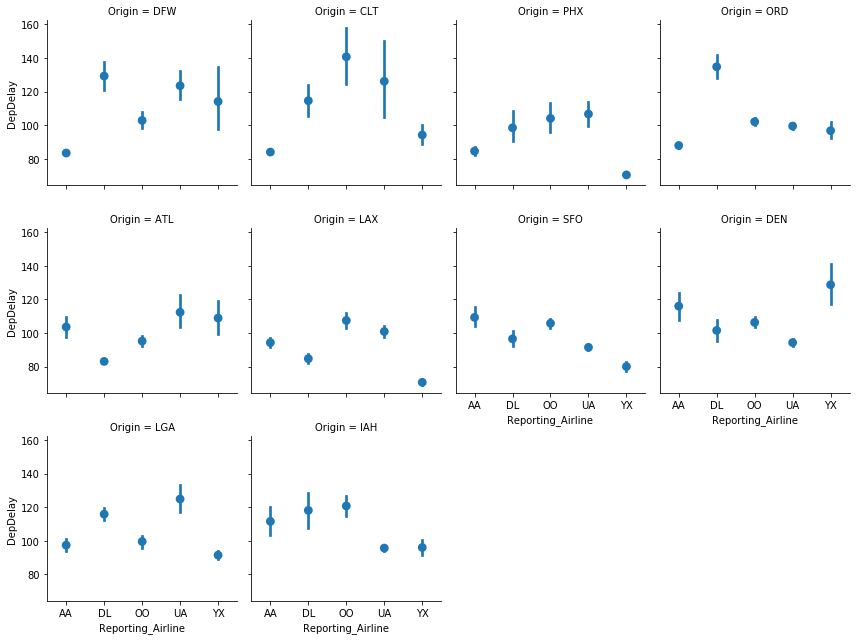

In [80]:
# let's see what happens whith the long delays
plt.figure(figsize = [12,10])
g=sb.FacetGrid(data = flights_cities_air[flights_cities_air.DepDelay > 30], col = 'Origin', col_wrap=4, size=3)
g.map(sb.pointplot, 'Reporting_Airline', 'DepDelay',linestyles="")

- We see only a standing point: Origin ORD and Airline DL

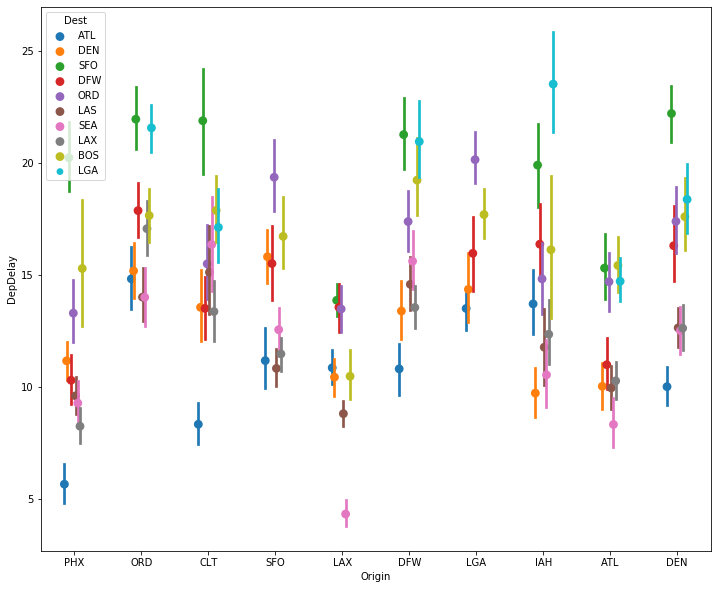

In [81]:
# let's do the same for the most common routes
plt.figure(figsize = [12,10])
sb.pointplot(data = routes, x = 'Origin', y = 'DepDelay', hue = 'Dest',linestyles = '', dodge = 0.3);

- We have some routes with standing delays: PHX, CLT, DEN -> SF; ORD -> SF, LGA; LGA -> ORD; IAH -> LGA 
- There are some with really low delays: PHX, CLT, DFW, DEN -> ATL; LAX -> SEA

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> When we consider Month and Day of the Week togheter we can conlcude some things about how the date impacts on delay. This also happens when we consider different routes or combinations of Origin city and Airline.

### Were there any interesting or surprising interactions between features?

> Yes, I expected a relation between date and delay in Rochester, but this didn't happend.